This notebook is a trial run based on IBMs Qiskit example on creating the first bell state. An API call is made to run this circuit on actual hardware.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [2]:
#setting up registers and circuits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#First bell state:
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q, creg_c)

print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [3]:
# Setting up six observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-08-04 22:36:03,925: Default instance not set. Searching all available instances.


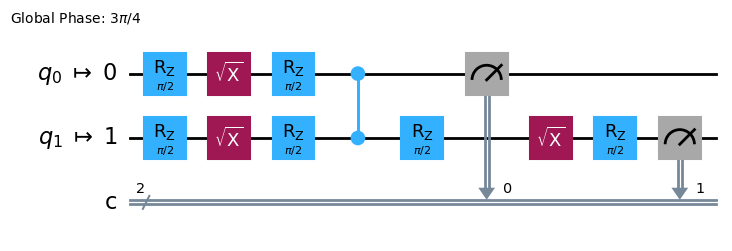

In [4]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [5]:
# Construct Estimator instance

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 1000

mapped_observables = [observable.apply_layout(isa_circuit.layout) for observable in observables]

job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d28hjdo56fsc73e7026g


In [6]:
job_result = job.result()

pub_result = job.result()[0]

KeyboardInterrupt: 